# Mission — Partie 1 : Analyse exploratoire

Ce notebook réalise une analyse exploratoire (EDA) sur le fichier **2016_Building_Energy_Benchmarking.csv**.

Objectifs:
- inspecter la qualité des données
- sélectionner les types de bâtiments pertinents
- proposer et choisir une target pour la modélisation
- détecter et expliquer des valeurs aberrantes

Les cellules de code sont prêtes à être exécutées dans l'ordre.


In [1]:
# Chargement des données
import pandas as pd
from pathlib import Path
csv_path = Path("2016_Building_Energy_Benchmarking.csv")
df = pd.read_csv(csv_path, low_memory=False)
print("Shape:", df.shape)
print("\nColonnes ({}):\n".format(len(df.columns)), df.columns.tolist()[:40])
df.head()


Shape: (3376, 46)

Colonnes (46):
 ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [ ]:
# Informations générales et types
df.info(verbose=True)


In [2]:
# Résumé des valeurs manquantes (nombre et pourcentage)
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
pd.concat([missing, missing_pct], axis=1, keys=['missing_count','missing_pct']).head(40)


,missing_count,missing_pct
Comments,3376,100.00
Outlier,3344,99.05
YearsENERGYSTARCertified,3257,96.48
ThirdLargestPropertyUseType,2780,82.35
ThirdLargestPropertyUseTypeGFA,2780,82.35
SecondLargestPropertyUseType,1697,50.27
SecondLargestPropertyUseTypeGFA,1697,50.27
ENERGYSTARScore,843,24.97
LargestPropertyUseTypeGFA,20,0.59
LargestPropertyUseType,20,0.59


In [11]:
# Comptage par type de bâtiment (PrimaryPropertyType / PropertyType)
candidates = [c for c in df.columns if 'Property' in c or 'Type' in c or 'property' in c.lower()]
print('Candidates columns:', candidates)


Candidates columns: ['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']


In [3]:
# Valeurs pour les colonnes candidates (si elles existent)
for c in ['PrimaryPropertyType','PropertyName','Neighborhood','BuildingType']:
    if c in df.columns:
        print('\n---', c, '---')
        print(df[c].value_counts(dropna=False).head(15))



--- PrimaryPropertyType ---
PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Name: count, dtype: int64

--- PropertyName ---
PropertyName
Northgate Plaza               3
South Park                    2
Garden Court Apartments       2
Fairview                      2
Canal Building                2
Central Park                  2
Bayview Building              2
Parkside                      2
Crestview Apartments          2
Lakeview                      2
Airport Way                   2
Jefferson Cou

In [4]:
# Colonnes numériques et candidates pour la target
num = df.select_dtypes(include=['number']).columns.tolist()
len(num), num[:60]


(30,
 ['OSEBuildingID',
  'DataYear',
  'ZipCode',
  'CouncilDistrictCode',
  'Latitude',
  'Longitude',
  'YearBuilt',
  'NumberofBuildings',
  'NumberofFloors',
  'PropertyGFATotal',
  'PropertyGFAParking',
  'PropertyGFABuilding(s)',
  'LargestPropertyUseTypeGFA',
  'SecondLargestPropertyUseTypeGFA',
  'ThirdLargestPropertyUseTypeGFA',
  'ENERGYSTARScore',
  'SiteEUI(kBtu/sf)',
  'SiteEUIWN(kBtu/sf)',
  'SourceEUI(kBtu/sf)',
  'SourceEUIWN(kBtu/sf)',
  'SiteEnergyUse(kBtu)',
  'SiteEnergyUseWN(kBtu)',
  'SteamUse(kBtu)',
  'Electricity(kWh)',
  'Electricity(kBtu)',
  'NaturalGas(therms)',
  'NaturalGas(kBtu)',
  'Comments',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'])

## Proposition de target

Après inspection rapide, plusieurs colonnes sont candidates (exemples : consommation totale, EUI - Energy Use Intensity, émissions GHG). 

Dans ce notebook nous choisissons comme *target* la colonne **`Site Energy Use (kBtu)`** si elle existe, sinon nous proposons `Site EUI (kBtu/ft2)` ou `TotalGHGEmissions` selon disponibilité.

Raisons :
- `Site Energy Use (kBtu)` représente la consommation totale d'énergie du bâtiment (valeur continue adaptée à la régression).
- `Site EUI (kBtu/ft2)` est normalisée par surface (utile si on veut comparer bâtiments de tailles différentes).

On garde une trace du nombre de lignes avant/après filtrage et on expliquera les choix de nettoyage.


In [5]:
# Choix automatique de la target et statistiques de base
possible_targets = ['Site Energy Use (kBtu)','Site EUI (kBtu/ft2)','ENERGY STAR Score','TotalGHGEmissions']
target = next((t for t in possible_targets if t in df.columns), None)
print("Target choisie:", target)
if target:
    print(df[target].describe())
    print("\nValeurs manquantes pour la target:", df[target].isna().sum(), "soit", (df[target].isna().mean()*100).round(2), "%")
else:
    print("Aucune des targets candidates n'a été trouvée — il faudra choisir manuellement.")


Target choisie: TotalGHGEmissions
count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

Valeurs manquantes pour la target: 9 soit 0.27 %


In [6]:
# Distribution de la target et relation avec la surface (Gross Floor Area)
import matplotlib.pyplot as plt
if 'Site Energy Use (kBtu)' in df.columns:
    col = 'Site Energy Use (kBtu)'
elif 'Site EUI (kBtu/ft2)' in df.columns:
    col = 'Site EUI (kBtu/ft2)'
else:
    col = None

print("Colonne étudiée:", col)
if col:
    display(df[col].dropna().describe())
    plt.figure(figsize=(8,4))
    plt.hist(df[col].dropna(), bins=50)
    plt.title("Distribution de {}".format(col))
    plt.xlabel(col); plt.ylabel('count')
    plt.tight_layout()
    plt.show()
    
    if 'Gross Floor Area' in df.columns:
        plt.figure(figsize=(6,5))
        plt.scatter(df['Gross Floor Area'].replace(0, pd.NA), df[col], s=6)
        plt.xscale('log'); plt.yscale('log')
        plt.xlabel('Gross Floor Area (log)'); plt.ylabel(col + ' (log)')
        plt.title("{} vs Gross Floor Area".format(col))
        plt.tight_layout()
        plt.show()
else:
    print('Pas de colonne target disponible pour ces visualisations.')


Colonne étudiée: None
Pas de colonne target disponible pour ces visualisations.


,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,1.000,NaN,0.085,-0.089,0.093,0.040,0.177,0.026,-0.103,-0.137,...,-0.118,-0.203,-0.034,-0.130,-0.130,-0.086,-0.086,NaN,-0.100,-0.035
DataYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,0.085,NaN,1.000,-0.063,0.031,-0.121,0.095,-0.010,-0.118,-0.053,...,-0.042,-0.050,-0.039,-0.037,-0.037,-0.029,-0.029,NaN,-0.048,-0.083
CouncilDistrictCode,-0.089,NaN,-0.063,1.000,0.489,-0.265,-0.021,-0.013,0.250,0.098,...,0.040,0.057,0.008,0.056,0.056,0.003,0.003,NaN,0.017,0.003
Latitude,0.093,NaN,0.031,0.489,1.000,0.005,0.117,0.021,-0.024,-0.018,...,-0.021,-0.042,-0.015,-0.019,-0.019,-0.021,-0.021,NaN,-0.026,-0.041
Longitude,0.040,NaN,-0.121,-0.265,0.005,1.000,-0.051,0.018,-0.026,0.025,...,0.034,0.032,0.019,0.027,0.027,0.033,0.033,NaN,0.037,0.039
YearBuilt,0.177,NaN,0.095,-0.021,0.117,-0.051,1.000,-0.024,0.146,0.100,...,0.027,0.069,-0.018,0.040,0.040,0.023,0.023,NaN,0.013,-0.146
NumberofBuildings,0.026,NaN,-0.010,-0.013,0.021,0.018,-0.024,1.000,-0.026,0.693,...,0.691,0.090,0.398,0.735,0.735,0.062,0.062,NaN,0.405,0.028
NumberofFloors,-0.103,NaN,-0.118,0.250,-0.024,-0.026,0.146,-0.026,1.000,0.400,...,0.206,0.293,0.079,0.252,0.252,0.065,0.065,NaN,0.136,-0.042
PropertyGFATotal,-0.137,NaN,-0.053,0.098,-0.018,0.025,0.100,0.693,0.400,1.000,...,0.797,0.401,0.441,0.850,0.850,0.183,0.183,NaN,0.531,0.020


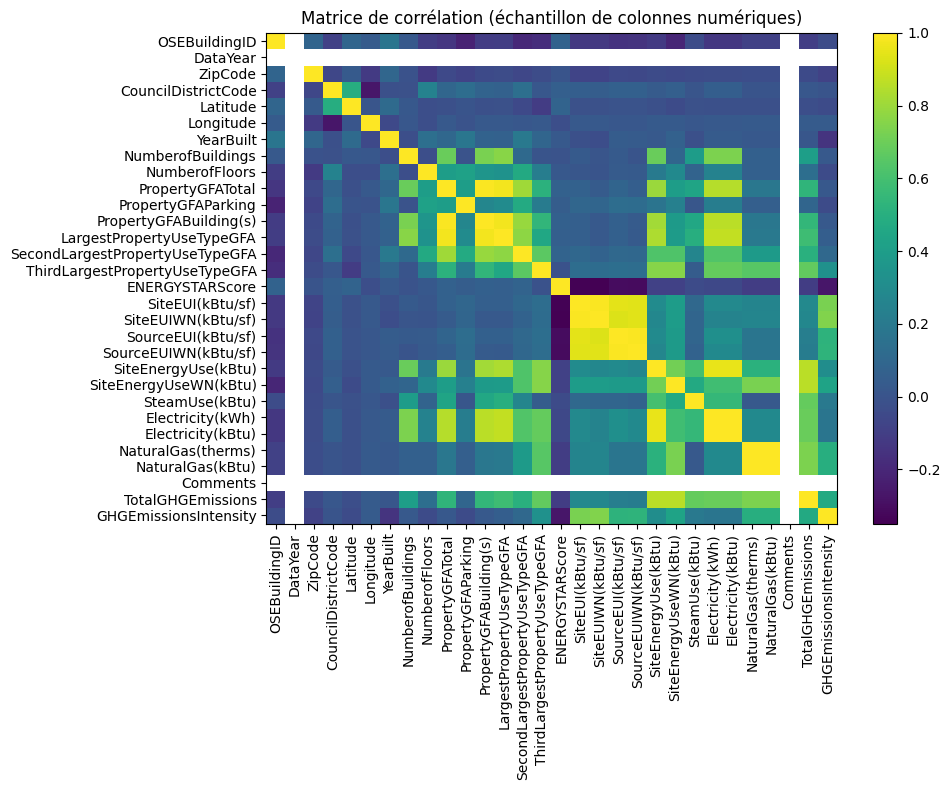

In [7]:
# Corrélations — matrice sur les principales colonnes numériques (corr pairwise)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
sample_cols = num_cols[:30]
import numpy as np
corr = df[sample_cols].corr()
display(corr.round(3))
# heatmap basique
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto', interpolation='none')
plt.colorbar()
plt.xticks(range(len(sample_cols)), sample_cols, rotation=90)
plt.yticks(range(len(sample_cols)), sample_cols)
plt.title('Matrice de corrélation (échantillon de colonnes numériques)')
plt.tight_layout()
plt.show()


In [8]:
# Détection et suppression d'exemples de bâtiments incohérents
df_clean = df.copy()
initial_count = len(df_clean)
if 'Gross Floor Area' in df_clean.columns:
    df_clean = df_clean[df_clean['Gross Floor Area'] > 10]  # filtrer surfaces <= 10 ft2
if 'Year Built' in df_clean.columns:
    df_clean = df_clean[df_clean['Year Built'] <= 2016]   # dataset 2016 donc année de construction future suspecte
if 'Site Energy Use (kBtu)' in df_clean.columns:
    df_clean = df_clean[(df_clean['Site Energy Use (kBtu)'] > 0) & (df_clean['Site Energy Use (kBtu)'] < df_clean['Site Energy Use (kBtu)'].quantile(0.999))]
final_count = len(df_clean)
print("Lignes initiales: {}, après filtrage simple: {}, supprimées: {}".format(initial_count, final_count, initial_count-final_count))


Lignes initiales: 3376, après filtrage simple: 3376, supprimées: 0


In [10]:
# Sauvegarde d'un snapshot pour la modélisation
out_path = Path("cleaned_building_energy_snapshot.csv")
df_clean.to_csv(out_path, index=False)
print("✅ Snapshot enregistré dans :", out_path.resolve())


✅ Snapshot enregistré dans : C:\Users\33664\OneDrive\Bureau\consommation de bâtiments\cleaned_building_energy_snapshot.csv


## Recommandations et prochaines étapes

1. Confirmer la target choisie (Site Energy Use vs Site EUI) selon l'objectif: prédire consommation totale ou intensité énergétique.
2. Évaluer l'impact des bâtiments non résidentiels / résidentiels : filtrer sur `PrimaryPropertyType` ou une colonne équivalente.
3. Imputer les valeurs manquantes pour features importantes (ex: Gross Floor Area) plutôt que de supprimer massivement.
4. Encoder correctement les variables qualitatives (OneHot / Target encoding selon cardinalité).
5. Construire un pipeline scikit-learn: preprocessing (imputer, scaler, encoder) + modèle (RandomForest / GradientBoosting) et validation croisée.

Gardez une trace du nombre d'observations à chaque étape de nettoyage — ceci est crucial pour suivre l'impact des choix.
